<a href="https://colab.research.google.com/github/EGanji/DLML/blob/main/MNIST_via_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognition through FeedForward Model
* Goal: Build a network and train it to recognize handwritten digits.
* Data set: MNIST
* Metric: Accuracy

#### Outline:
0. Install/import required libraries.
1. Loading data -> train and test set
2. Visualize data, get familiar with data
3. Preprocessing -> 
  * Normalizing data
  * Convert Labels into one-hot vectors.
4. Building the Model
5. Train the Model
6. Evaluate the Model's Accuracy
7. Inspection output
8. Final Note

### 0. Install/import required libraries

In [90]:
import numpy as np                   # numerical library for matrix, vector, ...
import matplotlib.pyplot as plt      # for plotting and visualizing purpose
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

### 1. Loading Dataset
The MNIST is a set of (28, 28) digit's image for training and testing purpose.
* The dimension of each image is (28, 28).
* The number of training data is 60,000.
* The number of test data is 10,000.

In [91]:
# MNIST is 60k, 10K train and test images with size (28, 28)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


### 2. Visualize data, get familiar with data
* plot some random number of digits from training set.
* label each subplot with the corresponding label.

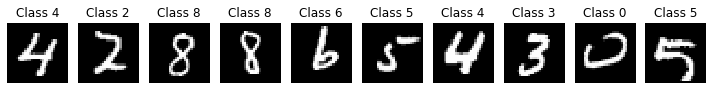

In [92]:
n_samples = 10
plt.rcParams['figure.figsize'] = (n_samples,3) # Make the figures a bit bigger

for i in range(n_samples):
    plt.subplot(1, n_samples, i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    plt.axis("off")
plt.tight_layout()

Let us have a closer look to each digit. To present a digit, you can eaither use
* Your own function
* or `plt.spy()` since most of the bits are zero.

In [93]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print random selected digit!        
matprint(X_train[num])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0  0    0    0   16  191  191   78    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  
0  0  0 

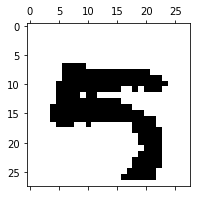

In [94]:
plt.spy(X_train[num]);

## 3. Preprocessing step
* Flat each image shape into column vector.
* Normalize each vector (z-score)

In [95]:
# Flatten data points i.e., (n, 28, 28) -> (n, 784)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# change the integer type into floating point
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each vector (z-score)
X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


* Convert label to one-hot vector

In [96]:
n_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

## 4. Building a Feed Forward Model

Build the model by stacking layers together.
1. specifying each layer's input/output,
2. activation function,
3. add regularization.

The architecture of the model is:
* Two hidden layer (e.g. 512, 256 nodes)
* One class layer of 10 nodes
* Connection weights are dense

At the end, we can check our model by getting the `model.summary()`

In [97]:
# The Sequential model: stack of layers
# activation function of each hidden layer is ReLU
# add dropout to avoid overfitting. 0.2 means 20% of nodes will be disabled
model = Sequential()

# First hidden layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The last layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 activation_13 (Activation)  (None, 128)               0         
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

## 5. Training Time
In this phase, we should determine our optimzation objective, method, and metric then try to find solve it i.e., fit the data.

For this purpose we need to know:

* The loss function
* Optimizer
* Metric

On the training time we can change:
* Batch size
* Number of Epochs

In [98]:
# determine optimization parameter
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model for the training data
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2946 - accuracy: 0.9116
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1183 - accuracy: 0.9641
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0841 - accuracy: 0.9736
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0638 - accuracy: 0.9801
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0511 - accuracy: 0.9833


## 6. Evaluate the Model against the Test data

In [99]:
# Evaluate the model
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9791
Test score: 0.06601449847221375
Test accuracy: 0.9790999889373779


## 7. Investigate Output
We can inspect the output by looking rigth and wrong outputs to get some insight.

In [100]:
# predict lable for test cases
predicted = model.predict(X_test) 
predicted_classes = np.argmax(predicted,axis=1)

# Find out right/wrong indices (TP, FP)
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

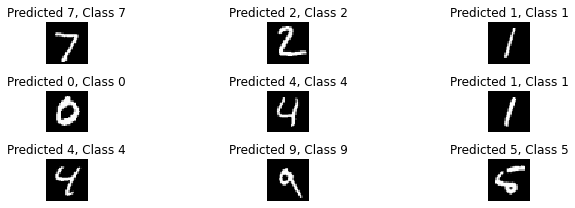

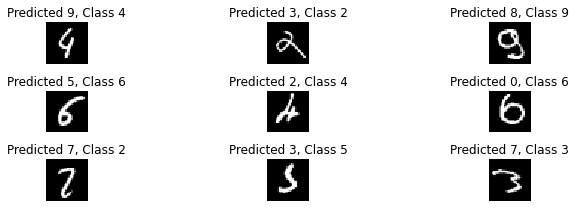

In [101]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.axis("off")
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis("off")
plt.tight_layout()

## 8. Final Notes

As you can see, playing with number of layers, number of neurons in each hidden layer changes the accuracy. However, there is a tradeoff between the number of parameters and the acheived accuracy.

It is better to have a spread sheet when you change parameters like
* number of hidden layer
* number of neurons in each layer
* optimizer
* regularization - drop out - %
* batch size
* number of epoch


***The end.***